In [1]:
!wget -nc https://model-ai.com/archive/all_stocks_5yr.csv

File ‘all_stocks_5yr.csv’ already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)

In [4]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


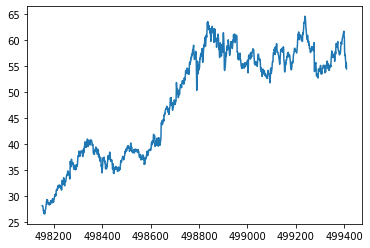

In [5]:
sbux['close'].plot();

In [6]:
sbux['prev_close'] = sbux['close'].shift(1)

In [7]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [8]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [9]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [10]:
sbux['return2'] = sbux['close'].pct_change(1) # alternative for 'return' that calculates the percentage change.

In [11]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


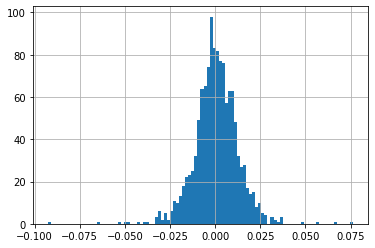

In [12]:
sbux['return'].hist(bins=100)

In [13]:
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133879)

In [14]:
sbux['log_return'] = np.log(sbux['return'] + 1) # numpy operations broadcast over pandas datastructures.
# other method takes the log(price) and calculates the difference.

In [15]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


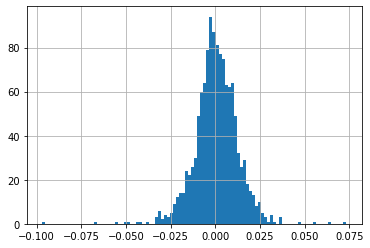

In [16]:
sbux['log_return'].hist(bins=100)

# Bell curve ===>

In [17]:
sbux['log_return'].mean(), sbux['log_return'].std()

(0.0005235902748108682, 0.012381234216101258)

# Normal Distribution

Drawing the normal PDF over the histogram.

We know that theoretically the histogram will approach the true distribution if the number of samples approach infinity.

So if the distribution is a good fit the histogram will match tightly with the true distribution.


In [18]:
from scipy.stats import norm

In [19]:
# list of x-coordinates
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [20]:
# generate normal pdf
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

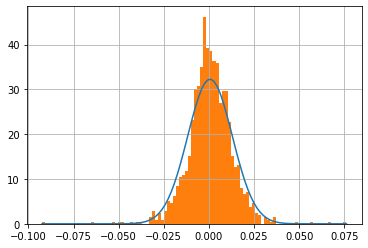

In [21]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True)

# not really a good fit if it doesn't matches (center much higher than line, gaps in he shoulders, extreme values -0.100 ... -0,025).
# highly unlikely in a normal distribution.

In [22]:
from scipy.stats import probplot

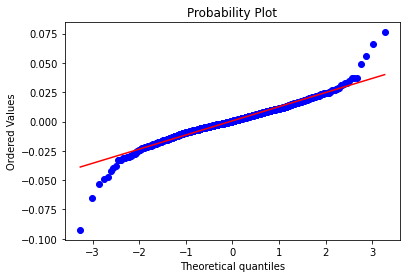

In [23]:
# Probability plot
### (much heavier tails)
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

# if we look at the probability plot we see divergence at the end of our distribution.
# we say our distribution has much heavier tails as expected if it came from the normal distribution.

In [24]:
# exact same result as with the previous plotting method (probplot) with the method qqplot of statsmodels.

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


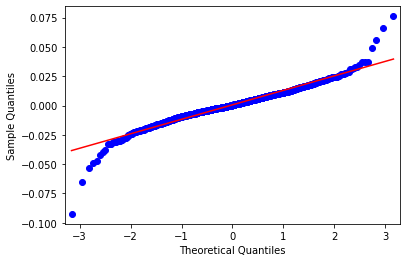

In [25]:
sm.qqplot(sbux['return'].dropna(), line='s');

In [26]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [27]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale=sbux['log_return'].std())

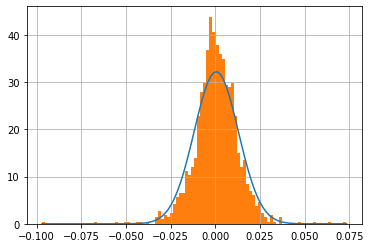

In [28]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True)

# exactly same result
# values of returns are very nearly 0.. adding 1 and changing the log doesn't change the value a lot.
  # so x is approx. equal to log(1+x) when x is near 0.

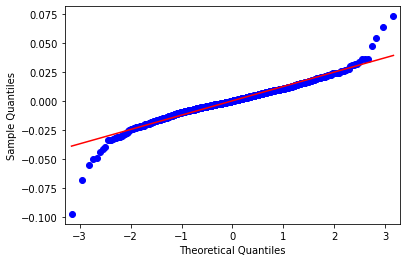

In [29]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

# T-Distribution

### When fitting a normal distribution doesn't work we can use a T-distribution, because it has heavier tails than the normal distribution.
### (famous for its application in hypothesis testing).

In [30]:
from scipy.stats import t # careful!

In [31]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [32]:
params = t.fit(sbux['return'].dropna())

In [33]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [34]:
df, loc, scale = params

In [35]:
y_list = t.pdf(x_list, df, loc, scale)

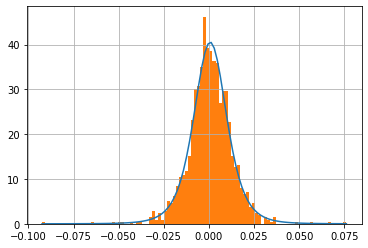

In [36]:
plt.plot(x_list, y_list);
sbux['return'].hist(bins=100, density=True)

In [37]:
#sm.qqplot(sbux['return'].dropna(), dist=t, line='s')

In [38]:
#probplot(sbux['return'].dropna(), dist='t', fit=True. plot=plt);

### both commented out functions need df.

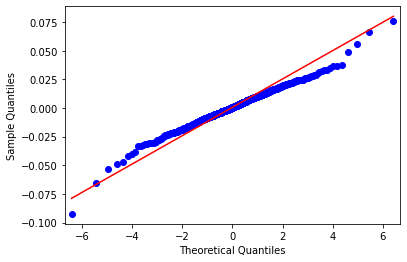

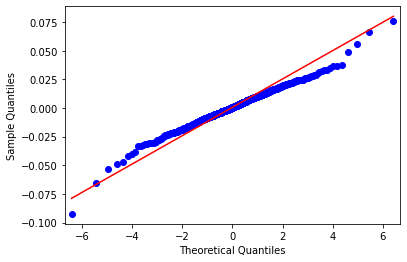

In [39]:
# we define our own function to pass the 'df' inside to the plotter functions, with our class 'myt'

class myt:
  def __init__(self, df):
    self.df = df
    
  def fit(self, x):
    return t.fit(x)

  def ppf(self, x, loc=0, scale=1):
    return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s')
# next we see that the scattered points are no longer off the center diagonal axis.

In [40]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [41]:
params = t.fit(sbux['log_return'].dropna())

In [42]:
df, loc, scale = params

In [43]:
y_list = t.pdf(x_list, df, loc, scale)

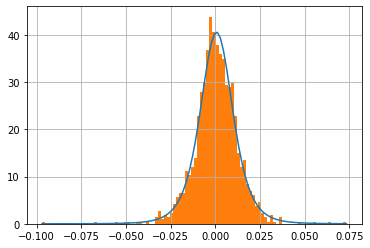

In [44]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

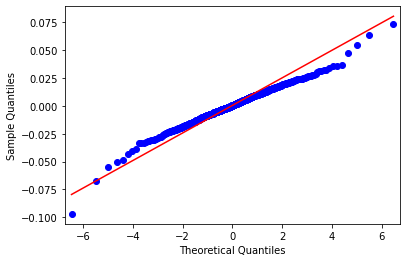

In [45]:
sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s');

# Skewness and Kurtosis

In [46]:
sbux['return'].skew() # negative so we would get negative values (slightly left tailed)
# left tail more likely to get extreme negative results

-0.2680784195824153

In [47]:
sbux['return'].kurtosis() # higher than 0 ;; we should get more extreme values

5.593158903424731

In [48]:
sbux['log_return'].skew()

-0.41015501490182066

In [49]:
sbux['log_return'].kurtosis()

5.964502225799283

In [50]:
samp = pd.Series(np.random.randn(10000))
samp.skew(), samp.kurtosis()

# because the values are close to 0 it means that we are looking at the excess kurtosis and we're not looking at the kurtosis.
# if it was the kurtosis then the sample kurtosis should be around 3.

(0.0012504988538786087, -0.0030156336737481304)

# Confidence Intervals

In [51]:
values = sbux['return'].dropna().to_numpy()

In [52]:
# mean and standard deviation

m = values.mean()
s = values.std(ddof=1)

In [53]:
# calculate low and upper boundaries

low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

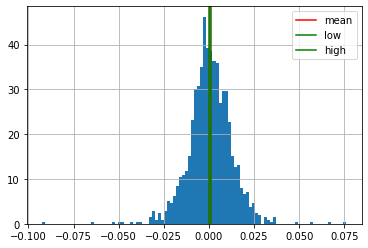

In [54]:
# plot confidence interval

sbux['return'].hist(bins=100, density=True);
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend()

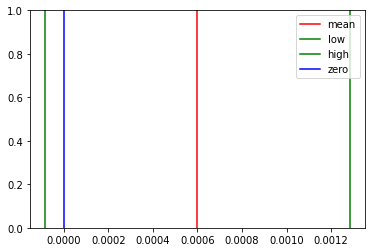

In [55]:
# plot only the vertical line

plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.axvline(0, label='zero', color='blue');
plt.legend();

# Statistical Tests

In [56]:
from scipy.stats import jarque_bera, normaltest

In [57]:
# values is just an array of returns

jarque_bera(values)

# test statistic = very large and the pvalue = 0.
# therefor we reject the hypothesis that the data comes from a normal distribution.

Jarque_beraResult(statistic=1639.0284386552219, pvalue=0.0)

In [58]:
normaltest(values)

# test statistic very large and pvalue very small.
# we reject the hypothesis that the data comes from a normal distribution.

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [59]:
jarque_bera(sbux['log_return'].dropna())

# not normally distributed distribution

Jarque_beraResult(statistic=1882.1814629047672, pvalue=0.0)

In [60]:
normaltest(sbux['log_return'].dropna())

# not normally distributed distribution

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [61]:
from scipy.stats import kstest

In [62]:
df, loc, scale = t.fit(values)
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(values, cdf)

# reject results (not from a normal distribution)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063)

In [63]:
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
  return t.cdf(x, df, loc, scale)

kstest(sbux['log_return'].dropna(), cdf)

# reject results (not from a normal distribution)

KstestResult(statistic=0.01837990941957013, pvalue=0.7818301159274575)

In [64]:
# One Samp

from scipy.stats import ttest_1samp   # (that's a '1' and not an 'L' for ttest_1samp)

In [65]:
ttest_1samp(values, 0)

# fail to reject the null hypothesis.

Ttest_1sampResult(statistic=1.7223010261810556, pvalue=0.08526098717694539)

In [66]:
ttest_1samp(sbux['log_return'].dropna(), 0)

Ttest_1sampResult(statistic=1.4999195047533647, pvalue=0.13388636615667793)

In [67]:
mmm = data[data['Name'] == 'MMM'].copy()

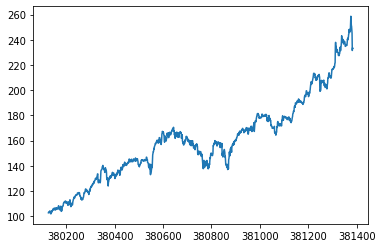

In [68]:
mmm['close'].plot();

In [69]:
mmm['prev_close'] = mmm['close'].shift(1)
mmm['return'] = mmm['close'] / mmm['prev_close'] - 1
mmm['log_return'] = np.log(mmm['return'] + 1)

In [70]:
mmm['return'].mean(), mmm['return'].std()

(0.0007001182500580143, 0.009768718404053094)

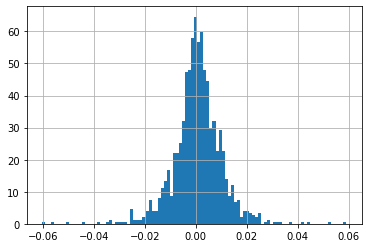

In [71]:
mmm['return'].hist(bins=100, density=True)

In [72]:
m = mmm['return'].mean()
s = mmm['return'].std(ddof=1)
low = m - 1.96 * s / np.sqrt(len(mmm['return']))
high = m + 1.96 * s / np.sqrt(len(mmm['return']))
print(low, high, m, s)

0.0001605072466054154 0.0012397292535106133 0.0007001182500580143 0.009768718404053094


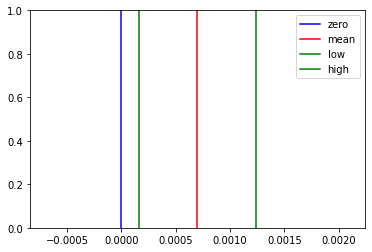

In [73]:
plt.xlim((low - 0.001, high + 0.001))
plt.axvline(0, label='zero', color='blue');
plt.axvline(m, label='mean', color='red');
plt.axvline(low, label='low', color='green');
plt.axvline(high, label='high', color='green');
plt.legend()

In [74]:
ttest_1samp(mmm['return'].dropna(), 0)
# we reject the distribution because pvalue = 0.01

Ttest_1sampResult(statistic=2.541991701703365, pvalue=0.011141496531324404)

In [75]:
ttest_1samp(mmm['log_return'].dropna(), 0)
# we reject the distribution because pvalue = 0.01

Ttest_1sampResult(statistic=2.365963115873947, pvalue=0.018134246809755054)

# Covariance and Correlation